# Logistic Regression

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_iris

## load dataset

In [2]:
iris=load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [3]:
x=iris.data
y=iris.target
x.shape,y.shape

((150, 4), (150,))

## Splitting the dataset into training and testing data


In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

# standardizing the data


In [5]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_train[0:5],x_test[0:5]

(array([[-1.72156775, -0.33210111, -1.34572231, -1.32327558],
        [-1.12449223, -1.22765467,  0.41450518,  0.6517626 ],
        [ 1.14439475, -0.5559895 ,  0.58484978,  0.25675496],
        [-1.12449223,  0.11567567, -1.28894078, -1.45494479],
        [-0.40800161, -1.22765467,  0.13059752,  0.12508575]]),
 array([[-1.72156775, -0.10821272, -1.40250384, -1.32327558],
        [ 0.30848902, -0.10821272,  0.64163131,  0.78343181],
        [-1.12449223, -1.45154306, -0.2668732 , -0.26992188],
        [-1.00507713, -1.67543145, -0.2668732 , -0.26992188],
        [-1.72156775,  0.33956406, -1.40250384, -1.32327558]]))

# creating model


In [6]:
model=LogisticRegression()
model.fit(x_train,y_train)
model.coef_,model.intercept_

(array([[-1.08894494,  1.02420763, -1.79905609, -1.68622819],
        [ 0.53633654, -0.36048698, -0.20407418, -0.80795703],
        [ 0.5526084 , -0.66372065,  2.00313027,  2.49418523]]),
 array([-0.30558672,  1.90855554, -1.60296882]))

# predicting the model


In [7]:
y_pred=model.predict(x_test)
y_pred[0:5],y_test[0:5]


(array([0, 2, 1, 1, 0]), array([0, 2, 1, 1, 0]))

# checking the accuracy of the model


In [8]:
print("Accuracy of the model is: ",accuracy_score(y_test,y_pred)*100)

Accuracy of the model is:  93.33333333333333


# checking the classification report


In [9]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



# confusion matrix


In [10]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  9]], dtype=int64)

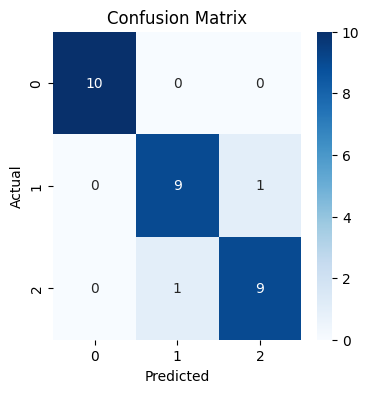

In [11]:
plt.figure(figsize=(4,4))
plt.title("Confusion Matrix")
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
